## Histogram of Oriented Gradients

- http://stackoverflow.com/questions/6090399/get-hog-image-features-from-opencv-python
- http://www.juergenwiki.de/work/wiki/doku.php?id=public:hog_descriptor_computation_and_visualization

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image then grayscale
image = cv2.imread('../../images/elephant.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

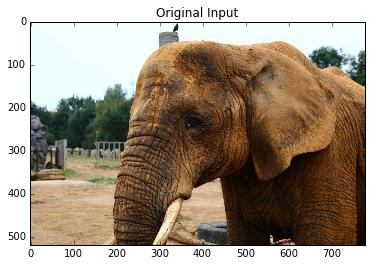

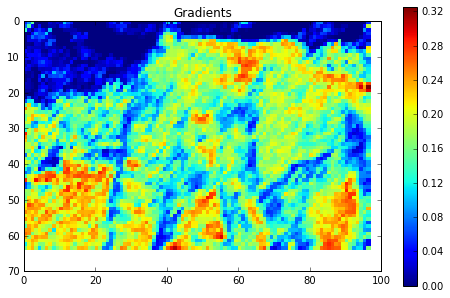

In [36]:


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Input')
cv2.imwrite('input.jpg', image)


# h x w in pixels
cell_size = (8, 8) 

 # h x w in cells
block_size = (2, 2) 

# number of orientation bins
nbins = 9

# Using OpenCV's HOG Descriptor
# winSize is the size of the image cropped to a multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(gray.shape[1] // cell_size[1] * cell_size[1],
                                  gray.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

# Create numpy array shape which we use to create hog_feats
n_cells = (gray.shape[0] // cell_size[0], gray.shape[1] // cell_size[1])

# We index blocks by rows first.
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.
hog_feats = hog.compute(gray).reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins).transpose((1, 0, 2, 3, 4))  

# Create our gradients array with nbin dimensions to store gradient orientations 
gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# Create array of dimensions 
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

# Block Normalization
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Plot HOGs using Matplotlib
# angle is 360 / nbins * direction
color_bins = 5
plt.figure(figsize=(8,5))
plt.pcolor(gradients[:, :, color_bins])
#axs[1].pcolor(cv2.cvtColor(gradients[:, :, color_bins], cv2.COLOR_BGR2RGB))
plt.title('Gradients')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
cv2.imwrite('gradients.jpg', gradients[:, :, color_bins])
plt.colorbar()

plt.show()

### 